In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.datasets import load_digits

# 한글
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

(1797, 8, 8)


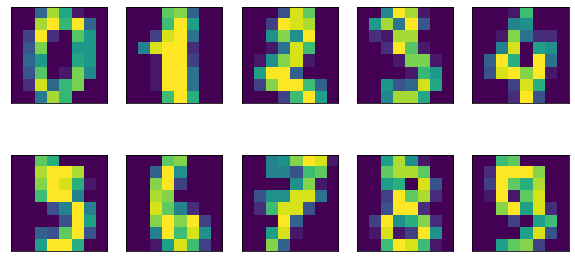

In [2]:
digits = load_digits()

print(digits.images.shape)
fig, axes = plt.subplots(2,5, figsize=(10,5),
                        subplot_kw = {'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [3]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [4]:
import numpy as np

In [7]:
# 0~16까지
print(np.max(digits.images), np.min(digits.images))

16.0 0.0


In [8]:
print(digits.target[1:15])
print(digits.target.shape)
print(digits.target_names)

[1 2 3 4 5 6 7 8 9 0 1 2 3 4]
(1797,)
[0 1 2 3 4 5 6 7 8 9]


Text(0, 0.5, '두 번째 주성분')

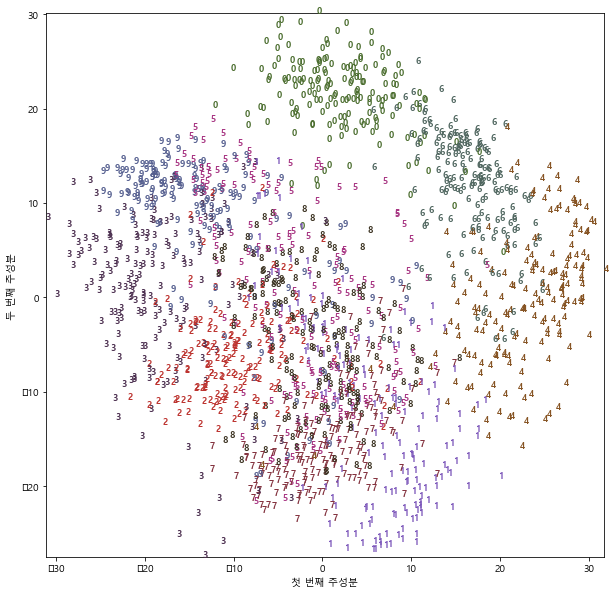

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)

# 처음 두 개의 주성분으로 숫자 데이터를 변환한다.
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))

# 두개의 주성분의 값의 범위를 x축, y축 지정
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())


for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
    
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [11]:
from sklearn.manifold import TSNE

In [12]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
tsne=TSNE(random_state=42)

d_tsne=tsne.fit_transform(digits.data)

Text(0.5, 0, 't-SNE 특성 1')

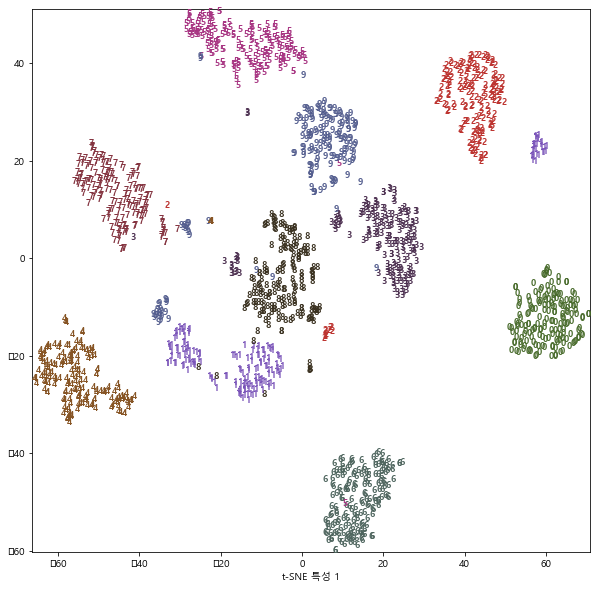

In [14]:
plt.figure(figsize=(10,10)) # 그래프 사이즈 지정.
plt.xlim(d_tsne[:,0].min(), d_tsne[:,0].max() + 1)
plt.ylim(d_tsne[:,1].min(), d_tsne[:,1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그린다.
    plt.text(d_tsne[i,0], 
             d_tsne[i,1],
             str(digits.target[i]),
             color =  colors[digits.target[i]],
             fontdict={'weight':'bold', 'size':9})
plt.xlabel("t-SNE 특성 0")
plt.xlabel("t-SNE 특성 1")